<a href="https://colab.research.google.com/github/solarslurpi/GrowBuddy/blob/main/notebooks/PAR_Buddy_mlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Multiple Linear Regression to Calibrate PAR Buddy

##### Copyright 2022 Margaret Johnson.
__Please send feedback to happyday.github@gmail.com__

MIT License

Copyright (c) 2022 Margaret Johnson

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Hello and Welcome!

[More detail on the PAR Buddy Project](https://github.com/solarslurpi/GrowBuddy/blob/main/pages/PAR_Buddy.md)

I'm exploring using an as7341 as a PAR meter.  Based on what I read in the article, [_A Novel Approach to Obtain PAR with a Multi-Channel Spectral Microsensor, Suitable for Sensor Node Integration_](https://pubmed.ncbi.nlm.nih.gov/34068029/), I thought I'd try using multiple linear regression.


# The Challenge

Use [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) to figure out the coefficients for each of the color bands.:

$$ PAR = b_0 + \sum_{i=1}^{n=8} (b_ix_i) + \epsilon $$

[Details on sampling](https://github.com/solarslurpi/GrowBuddy/blob/main/pages/PAR_Buddy.md#taking-samples)


# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [ ]:
url = 'https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/burple_02072022.csv'
readings_burple = pd.read_csv(url)
readings_burple


,PPFD,415,445,480,515,555,590,630,680
0,230,699,2150,1101,428,369,797,3418,3049
1,211,651,1795,1058,491,408,935,3759,3368
2,190,496,1496,902,400,349,797,3468,3116
3,182,369,1281,718,301,266,584,2664,2343
4,145,323,1039,606,265,235,508,2374,2175
5,225,641,1886,1013,430,369,822,3388,3024
6,219,649,1833,1043,484,397,881,3571,3208
7,177,545,1258,946,414,354,811,3540,3239
8,229,765,2294,1179,473,406,907,3740,3308
9,194,624,1758,994,437,382,869,3631,3322


In [ ]:
url = 'https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/as7341_white_02052022.csv'
readings_white = pd.read_csv(url)
readings_white


,PPFD,415,445,480,515,555,590,630,680
0,40,60,282,274,438,659,859,953,465
1,59,86,404,387,624,939,1219,1357,663
2,88,127,599,563,919,1384,1791,1998,977
3,117,170,803,743,1225,1847,2383,2662,1304
4,144,209,984,902,1495,2254,2901,3240,1591
5,166,241,1135,1034,1718,2592,3328,3718,1830
6,201,296,1390,1250,2094,3161,4057,4534,2238
7,230,332,1537,1422,2282,3468,4413,4939,2504
8,252,366,1689,1555,2501,3801,4830,5403,2745
9,275,398,1840,1685,2715,4130,5245,5866,2987


In [ ]:
url = 'https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/white_02092022.csv'
readings_white1 = pd.read_csv(url)
readings_white1

,PPFD,415,445,480,515,555,590,630,680
0,746,842,3826,3732,5392,8099,10121,11370,6316
1,742,891,4013,3920,5689,8580,10795,12121,6791
2,646,860,3809,3752,5443,8229,10386,11717,6657
3,603,851,3762,3696,5390,8167,10332,11753,6683
4,593,865,3832,3758,5485,8343,10561,12036,6847
5,543,837,3689,3627,5281,8044,10187,11667,6672
6,650,932,4162,4065,5913,9038,11445,13053,7369
7,698,961,4313,4200,6121,9343,11831,13451,7573
8,768,975,4423,4289,6245,9499,12001,13597,7578
9,777,951,4317,4190,6092,9243,11655,13161,7342


In [ ]:
readings = pd.concat([readings_burple,readings_white,readings_white1],sort=False,ignore_index=True)
readings

,PPFD,415,445,480,515,555,590,630,680
0,230,699,2150,1101,428,369,797,3418,3049
1,211,651,1795,1058,491,408,935,3759,3368
2,190,496,1496,902,400,349,797,3468,3116
3,182,369,1281,718,301,266,584,2664,2343
4,145,323,1039,606,265,235,508,2374,2175
5,225,641,1886,1013,430,369,822,3388,3024
6,219,649,1833,1043,484,397,881,3571,3208
7,177,545,1258,946,414,354,811,3540,3239
8,229,765,2294,1179,473,406,907,3740,3308
9,194,624,1758,994,437,382,869,3631,3322


In [ ]:
readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PPFD    50 non-null     int64
 1   415     50 non-null     int64
 2   445     50 non-null     int64
 3   480     50 non-null     int64
 4   515     50 non-null     int64
 5   555     50 non-null     int64
 6   590     50 non-null     int64
 7   630     50 non-null     int64
 8   680     50 non-null     int64
dtypes: int64(9)
memory usage: 3.6 KB


# CREATE TESTING AND TRAINING DATASET (80% Train / 20% Test)

In [ ]:
y = readings['PPFD']
y.head()

0    230
1    211
2    190
3    182
4    145
Name: PPFD, dtype: int64

In [ ]:
x = readings.iloc[:,1:]
x.head()

,415,445,480,515,555,590,630,680
0,699,2150,1101,428,369,797,3418,3049
1,651,1795,1058,491,408,935,3759,3368
2,496,1496,902,400,349,797,3468,3116
3,369,1281,718,301,266,584,2664,2343
4,323,1039,606,265,235,508,2374,2175


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
print(f"There are {len(x_train)} samples in the training set and {len(x_test)} samples in the test set.")

There are 40 samples in the training set and 10 samples in the test set.


# TRAIN MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression(fit_intercept=True)

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('linear model coefficients (m)',model.coef_)
print('linear model coefficients (b)',model.intercept_)

linear model coefficients (m) [-0.40131984  0.10130692  0.09701518  1.67098213 -0.57990393 -0.41017975
  0.03352534 -0.02829635]
linear model coefficients (b) -7.004923853104515


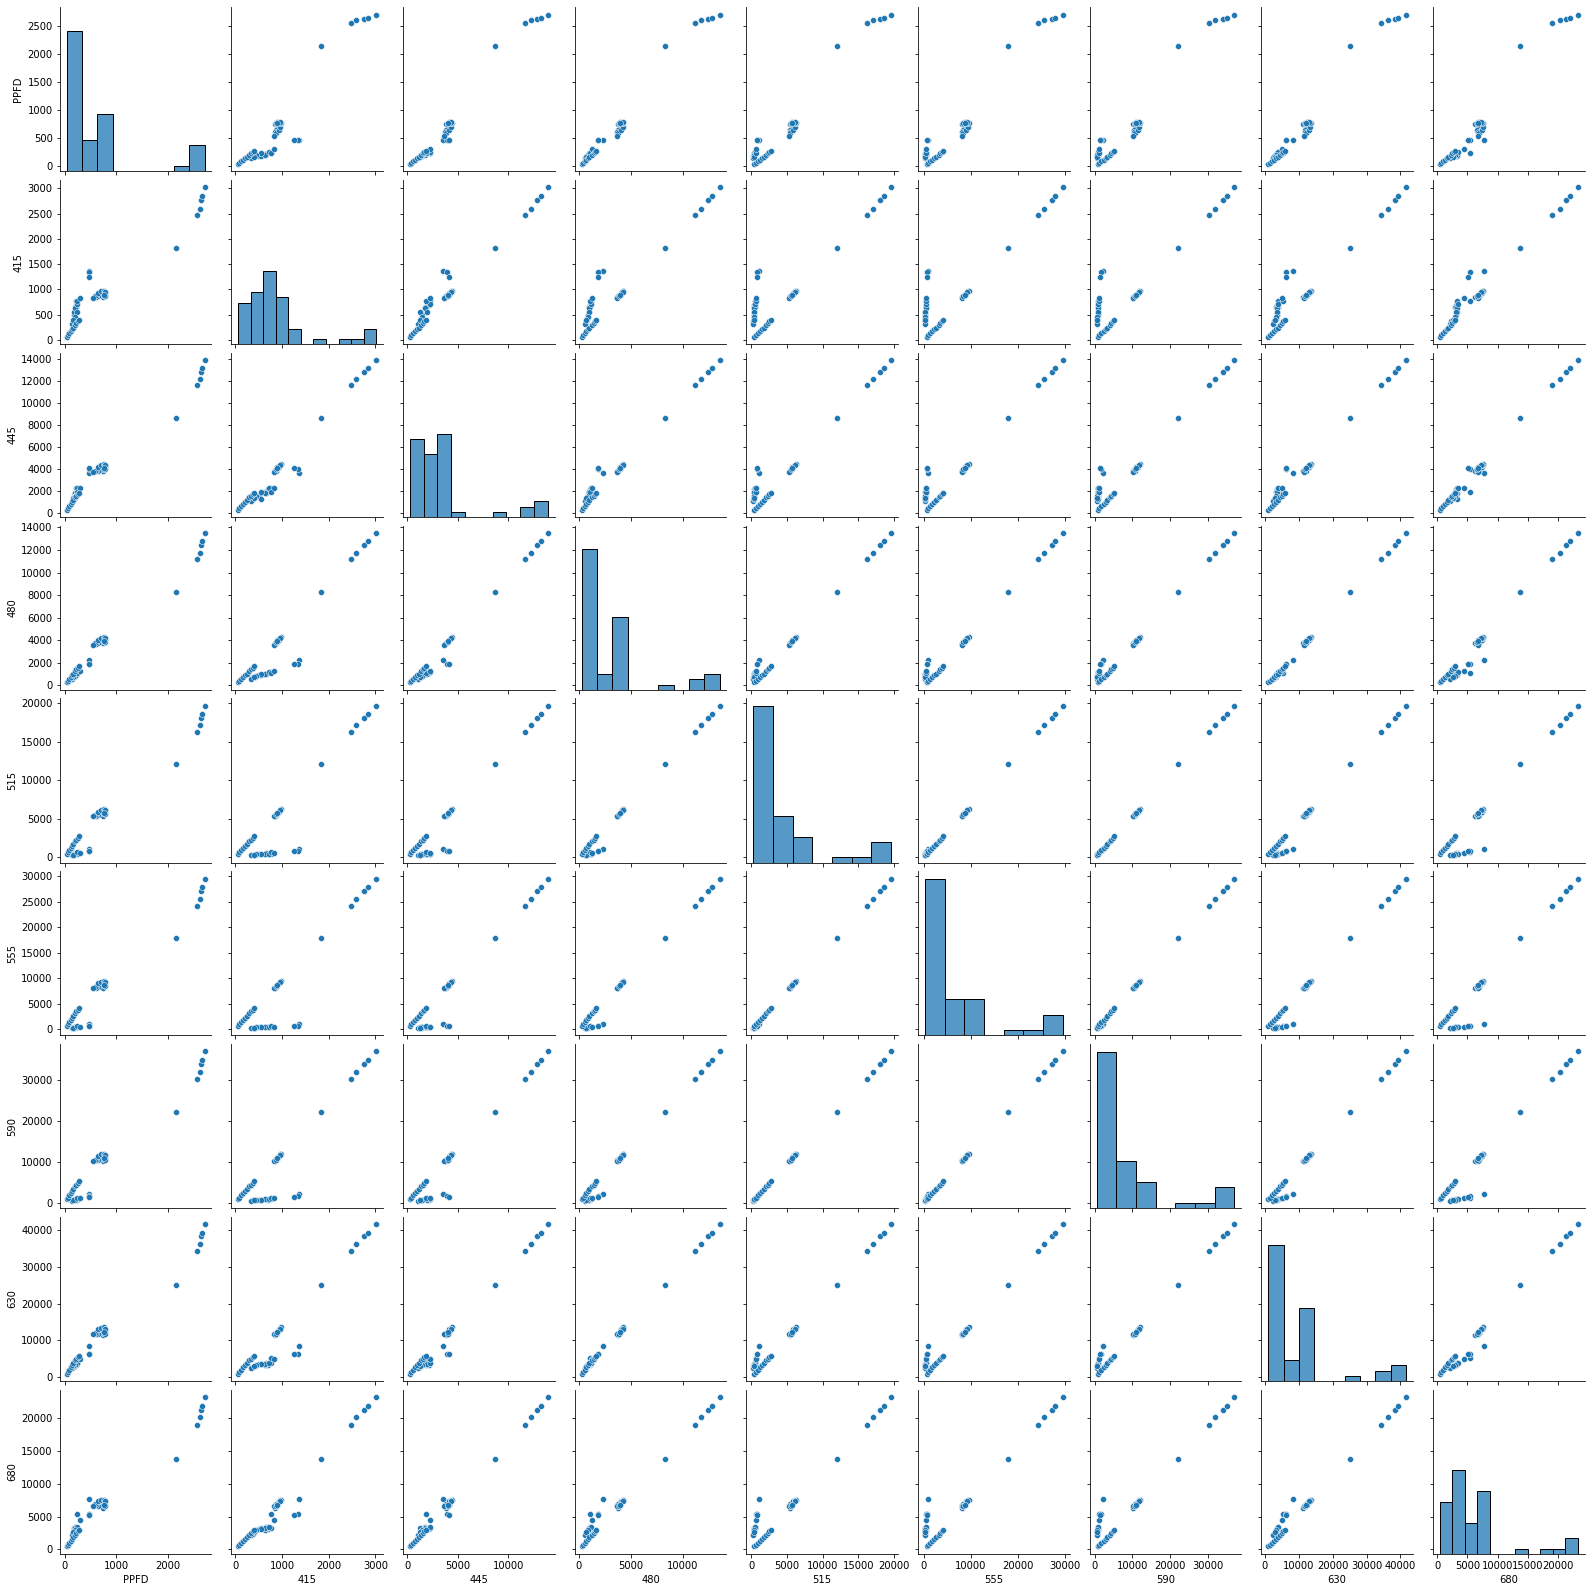

In [ ]:
import seaborn as sns
sns.pairplot(readings)

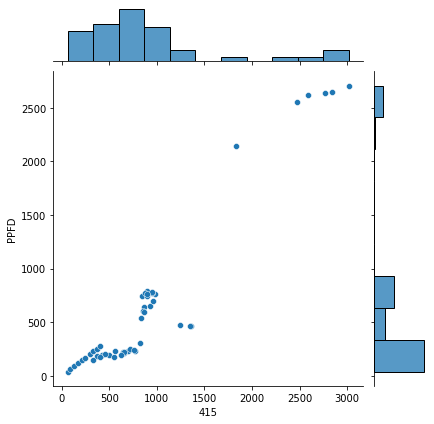

In [ ]:
sns.jointplot( x = '415', y = 'PPFD', data = readings)

# EVALUATE MODEL

In [ ]:
y_predict = model.predict(x_test)
print(y_predict)
print(y_test)

[ 160.99891048  265.53035411  751.21868735 2587.24609432  239.69268909
  711.50994169  165.84728598  226.82766809  443.87408657  128.9606591 ]
24     144
6      219
43     764
45    2556
0      230
38     768
14     173
26     201
19     475
23     117
Name: PPFD, dtype: int64


Text(0.5, 1.0, 'PPFD Predictions')

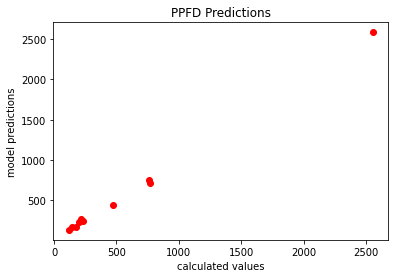

In [ ]:
plt.scatter(y_test,y_predict,color='r')
plt.ylabel('model predictions')
plt.xlabel('calculated values')
plt.title('PPFD Predictions')

In [ ]:
r2 = model.score(x_test,y_test)
r2

0.9982402832556251

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3F'))
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
k = x_test.shape[1]
n = len(x_test)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_predict)/y_test) ) * 1000

In [ ]:
print('RMSE = ',RMSE,'\nMSE = ',MSE,'\nMAE = ',MAE,'\nr2 = ',r2,'\nadj_r2 = ',adj_r2,'\nMAPE = ',MAPE)

RMSE =  29.511 
MSE =  870.8901693685932 
MAE =  24.980637359859347 
r2 =  0.9982402832556251 
adj_r2 =  0.9841625493006257 
MAPE =  81.27634463567688


# VISUALIZE THE RESULTS

In [ ]:
X = x.values.reshape(-1,2)
Y = readings['PPFD']

In [ ]:
X

array([[ 699, 2150],
       [1101,  428],
       [ 369,  797],
       [3418, 3049],
       [ 651, 1795],
       [1058,  491],
       [ 408,  935],
       [3759, 3368],
       [ 496, 1496],
       [ 902,  400],
       [ 349,  797],
       [3468, 3116],
       [ 369, 1281],
       [ 718,  301],
       [ 266,  584],
       [2664, 2343],
       [ 323, 1039],
       [ 606,  265],
       [ 235,  508],
       [2374, 2175],
       [ 641, 1886],
       [1013,  430],
       [ 369,  822],
       [3388, 3024],
       [ 649, 1833],
       [1043,  484],
       [ 397,  881],
       [3571, 3208],
       [ 545, 1258],
       [ 946,  414],
       [ 354,  811],
       [3540, 3239],
       [ 765, 2294],
       [1179,  473],
       [ 406,  907],
       [3740, 3308],
       [ 624, 1758],
       [ 994,  437],
       [ 382,  869],
       [3631, 3322],
       [ 558, 1932],
       [1024,  414],
       [ 354,  799],
       [3529, 3059],
       [ 718, 2248],
       [1168,  470],
       [ 404,  898],
       [3895,

In [ ]:
from sklearn import linear_model

In [ ]:
x = X[:,0]
y = X[:,1]
z = Y

x_pred = np.linspace(x.min(),x.max(),30)
y_pred = np.linspace(y.min(),y.max(),30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(X,Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)
r2

ValueError: ignored

ValueError: ignored

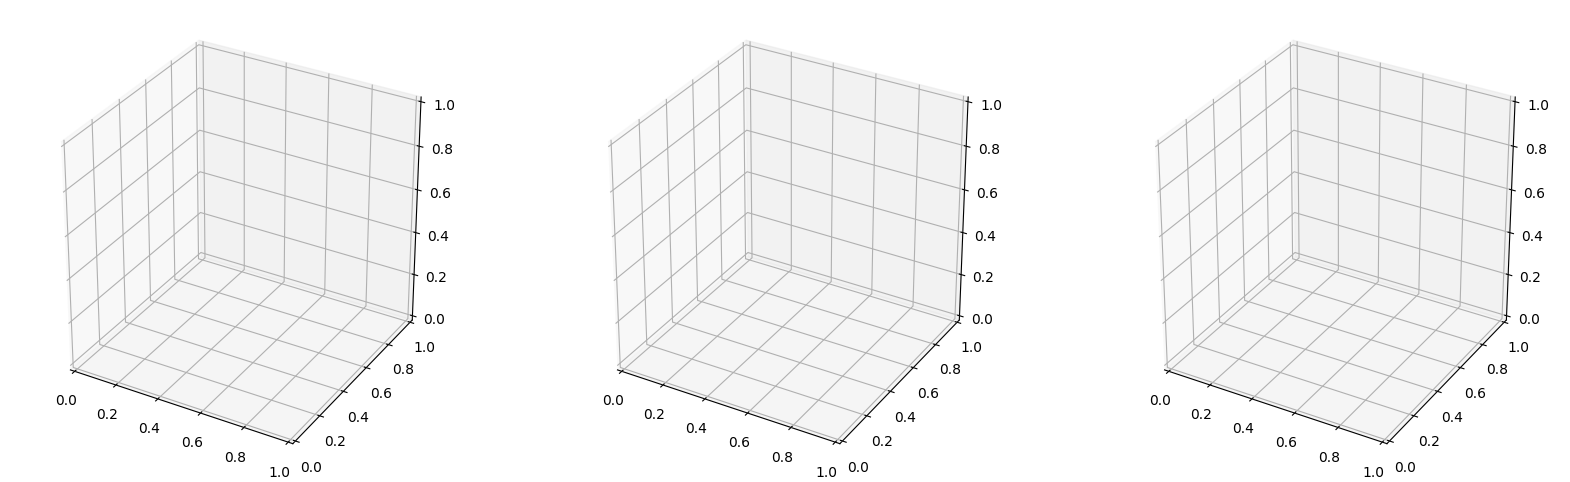

In [ ]:
plt.style.use('default')

fig = plt.figure(figsize=(20, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='b')
    ax.set_xlabel('415nm', fontsize=12)
    ax.set_ylabel('680nm', fontsize=12)
    ax.set_zlabel('PPFD', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')



ax1.view_init(elev=10, azim=120)
ax2.view_init(elev=0, azim=114)
ax3.view_init(elev=50, azim=100)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()